# COGS 118B - Final Project

# Finding Waldo 

## Group members

- Lillian Wood
- Taha Alam
- Zichen ‘Cardiff’ Jiang
- Will Lutz
- Sara Shao

# Introduction
In our project, we will perform PCA analysis on images of the character, Waldo, from Where’s Waldo to identify whether or not a test image is a picture of Waldo.

Utilizing a dataset of black and white images of Waldo, we will reduce the dimensionality of the vectorized images by calculating the eigenvalues and eigenvectors of the original image to reconstruct an image of Waldo in a smaller subspace. Once the eigenface is constructed using x number of principal components, we will be able to calculate the Euclidean distance between this constructed image and test images of both Waldo and non-Waldo projected into the same subspace to identify if the image is a picture of Waldo. The goal of this project is to elaborate on the topic of PCA that was discussed in class and present it in a fun and interactive way.

This project is important because finding Waldo manually is extremely tricky and time-consuming, sometimes ranging. Therefore, this intuitive PCA method to automatically find Waldo is needed.

# Related Work

Our project is based on the PCA example presented in class and in the homework. We will take the same steps to create the eigenfaces of our training and test sets of images. Once we create the eigenfaces for Waldo, we will follow the methods described in Liton Chandra Paul and Abdulla Al Sumam (2012) <a name="relatedwork"></a> [1](#relatedwork) in order to calculate the distance between the eigenfaces of the test images and the eigenfaces of the training images when projected into the subspace.

# Methods
Briefly, we collected 22 Waldo images, randomly vectorize 21 of them, and put these 21 vectors into a matrix. PCA will be done using these 21 images. The 22nd Waldo image will be used to test whether our eigenfaces can reconstruct this new image. Lastly, we tested our eigenfaces on a whole puzzle by breaking down the puzzle image to little square boxes and finding the box that has Waldo's face in it through reconstruction distance calculation.

### Collecting images
We collected images from various sources, including https://www.localguidesconnect.com/t5/General-Discussion/Alert-Answers-included-Waldo-Answers-if-you-guys-are-struggling/td-p/722677, https://petitefoxdesigns.wordpress.com/2015/11/05/wheres-waldo-wednesday-in-town/, https://github.com/wirooo/FolloWaldo, and so on. We whimsically selected some images from these websites, downloaded them, and manually croped them to a square where the tip of Waldo's right ear and Waldo's left cheekbone are roughly aligned at the same coordinates across cropped images. These images are named 1 to 22.jpg in `waldo_manual/`.

### Vectorizing Images
Each manually cropped images that roughly align with each other are of different pixel sizes. So we used `myimage.resize((x, x))` to resize each image to the same dimension so that the column vector representation of each image has the same size. 21 of the 22 Waldo images are used to form the input matrix that will be used to generate our eigenfaces.

### PCA
Explaination

### Reconstruction Distance Function
Explaination

# Results
Results - What did you discover? How well did it work?  As this is a class project, it is likely that many things did not work as well as planned.  For this project, detailing what went wrong is as important as describing what went well.  (approx 7 points)

### Preparing the images

vectorizing images explanation and code below

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize
import time
from PIL import Image
import random
%matplotlib inline
import pandas as pd
import os

In [2]:
# Ex. waldo_matrix = vectorize(100, 21, 'waldo_manual')
# 22 Waldo pictures are turned into a 30000 by 1 (100 pixel x 100 pixel x 3) column vector. So each col of this 40000 by 22 matrix is one of the pictures.
def vectorize(pixel, pic_num, pic_dir):
    pic_dim = pixel * pixel * 3
    A = np.empty([pic_dim, pic_num])

    file_ls = []
    for filename in os.listdir(pic_dir):
        f = os.path.join(pic_dir, filename)
        file_ls.append(f)

    for i in range(len(file_ls)):
        f = file_ls[i]
        print(f)
        img = Image.open(f).convert('RGB')
        img_resized = img.resize((pixel, pixel))
        arr = np.array(img_resized)
        flat_arr = arr.ravel()
        v = np.matrix(flat_arr)
        col_v = v.T
        A[:, i][:, np.newaxis] = col_v
        i += 1
    return A

In [3]:
# Ex. viewimage(waldo_input[:, 8], pixel)
def viewimage(vector, pixel):
    # Showing the 8th picture from the matrix
    vector_uint8 = vector.astype(np.uint8)
    shape = (pixel, pixel, 3)
    reconstruct_arr = np.asarray(vector_uint8).reshape(shape)
    reconstruct_img = Image.fromarray(reconstruct_arr, 'RGB')
    reconstruct_img.show()

In [19]:
pixel = 100
num = 22
data = vectorize(pixel, num, 'waldo_manual')
data.shape

waldo_manual/8.jpg
waldo_manual/9.jpg
waldo_manual/14.jpg
waldo_manual/15.jpg
waldo_manual/17.jpg
waldo_manual/16.jpg
waldo_manual/12.jpg
waldo_manual/13.jpg
waldo_manual/11.jpg
waldo_manual/10.jpg
waldo_manual/21.jpg
waldo_manual/20.jpg
waldo_manual/22.jpg
waldo_manual/18.jpg
waldo_manual/19.jpg
waldo_manual/4.jpg
waldo_manual/5.jpg
waldo_manual/7.jpg
waldo_manual/6.jpg
waldo_manual/2.jpg
waldo_manual/3.jpg
waldo_manual/1.jpg


(30000, 22)

In [20]:
# viewimage(data[:, 8], 100)

### PCA

PCA explanation and code below

In [21]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort


In [22]:
# normc(M) normalizes the columns of M to a length of 1.
def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)


In [23]:
meanface = np.mean(data, axis=1)
meanface = meanface[:, np.newaxis]
meanface

array([[146.18181818],
       [158.68181818],
       [122.95454545],
       ...,
       [163.72727273],
       [135.63636364],
       [124.68181818]])

In [24]:
(np.matlib.repmat(meanface, 1, num)).shape

(30000, 22)

In [26]:
data.shape

(30000, 22)

Subtract the mean from all of the data (using the command numpy.matlib.repmat), and call the matrix of mean-subtracted data A

In [27]:
A = data - np.matlib.repmat(meanface, 1, num)

In [28]:
eigvals, Vold = np.linalg.eig(A.T.dot(A))

In [29]:
V, D = eigsort(Vold, eigvals)

In [30]:
U = A.dot(V)
#then normalize
U = normc(U)
U.shape

(30000, 22)

In [31]:
#PCA
C = U.T.dot(data - meanface)

In [16]:
i = random.randint(0,21)

In [17]:
viewimage(data[:, i], pixel)

In [18]:
# reconstruct the 1st Waldo image in the input matrix "data"
c=C[:,i][:, np.newaxis]
xhat=U.dot(c) + meanface
viewimage(xhat, pixel)

### Reconstruction Distance Function

 explanation and code below

In [19]:
# original is flattened col vector of a face
def dist(original, reconstruction):
    return np.sum((original - reconstruction)**2)

In [20]:
original = data[:, i][:, np.newaxis]
reconstruct_dist = dist(original, xhat)
reconstruct_dist

218506.82165314042

### Reconstruct after removing the 6th Waldo image

In [21]:
# viewimage(data[:,i], pixel)
newfaces = np.delete(data,np.s_[i],axis=1)
newmeanface = np.mean(newfaces, axis=1, keepdims = True)
A2 = newfaces - newmeanface

eigvals2, Vold2 = np.linalg.eig(A2.T.dot(A2))
V2, D2 = eigsort(Vold2, eigvals2)
U2 = A2 @ V2
U2 = normc(U2)
c2 = U2.T.dot(data[:,i][:, np.newaxis] - meanface)
Zhat_all2 = U2.dot(c2) + meanface
viewimage(Zhat_all2, pixel)

In [22]:
original = data[:, i][:, np.newaxis]
reconstruct_missing_image_dist = dist(original, Zhat_all2)
diff = reconstruct_missing_image_dist-reconstruct_dist
print("reconstruct_missing_image_dist - reconstruct_dist =", diff, "\nreconstruct_missing_image_dist > reconstruct_dist")

reconstruct_missing_image_dist - reconstruct_dist = 137641743.28021306 
reconstruct_missing_image_dist > reconstruct_dist


### Reconstruct a non-Waldo image

In [23]:
f = 'non_waldo_manual/red.jpg'
img = Image.open(f).convert('RGB')
img_resized = img.resize((pixel, pixel))
arr = np.array(img_resized)
flat_arr = arr.ravel()
v = np.matrix(flat_arr)
nonWaldo = v.T
# viewimage(nonWaldo, pixel)

c3 = U.T.dot(nonWaldo - meanface)
Zhat_all3 = U.dot(c3) + meanface
# viewimage(Zhat_all3, pixel)

In [24]:
f = 'non_waldo_manual/glasses.jpg'
img = Image.open(f).convert('RGB')
img_resized = img.resize((pixel, pixel))
arr = np.array(img_resized)
flat_arr = arr.ravel()
v = np.matrix(flat_arr)
nonWaldo = v.T
# viewimage(nonWaldo, pixel)

c3 = U.T.dot(nonWaldo - meanface)
Zhat_all3 = U.dot(c3) + meanface
# viewimage(Zhat_all3, pixel)

### Finding Waldo

In [25]:
f = 'puzzle_test/test.jpg'
puzzle_pixel = 500
img = Image.open(f).convert('RGB')
img_resized = img.resize((puzzle_pixel, puzzle_pixel))
arr = np.array(img_resized)

box_ls = []
row_ls = [0, 100, 200, 300, 400, 500]
col_ls = [0, 100, 200, 300, 400, 500]
for i in range(5):
    for j in range(5):
        box = arr[row_ls[i]:row_ls[i+1], row_ls[j]:row_ls[j+1]]
        box_ls.append(box)


4.1 10281.128248799796


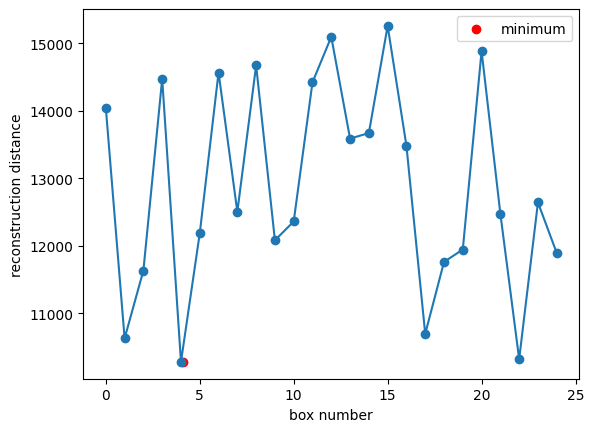

In [46]:
# 19 is Waldo
dist_ls = []
for i in range(25):
    flat_arr = box_ls[i].ravel()
    v = np.matrix(flat_arr)
    box_v = v.T
    # viewimage(box_v, pixel)
    c4 = U.T.dot(box_v - meanface)
    Zhat_all4 = U.dot(c4) + meanface
    # viewimage(Zhat_all4, pixel)
    # sprint(box_v.shape, Zhat_all4.shape)
    dist_ls.append(np.linalg.norm(Zhat_all4 - box_v))

data = {'box': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
        'recon_dist': dist_ls
       }
df = pd.DataFrame(data)

min_x = np.argmin(data['recon_dist'])+0.1
min_y = np.min(data['recon_dist'])
plt.plot(df['box'], df['recon_dist'], marker='o');
plt.scatter(min_x, min_y,c='r', label='minimum');
plt.legend();
plt.ylabel('reconstruction distance');
plt.xlabel('box number');
print(min_x, min_y)

In [47]:
i = 4
flat_arr = box_ls[i].ravel()
v = np.matrix(flat_arr)
box_v = v.T
viewimage(box_v, pixel)
c4 = U.T.dot(box_v - meanface)
Zhat_all4 = U.dot(c4) + meanface
viewimage(Zhat_all4, pixel)

In [48]:
i = 19
flat_arr = box_ls[i].ravel()
v = np.matrix(flat_arr)
box_v = v.T
viewimage(box_v, pixel)
c4 = U.T.dot(box_v - meanface)
Zhat_all4 = U.dot(c4) + meanface
viewimage(Zhat_all4, pixel)

# Comparison to Related Work?

if we have time, write about existing github repo

# Discussion
What did you learn?  What could you do better? (What would you
have done next if you had more time)?.....  Why do you think it didn't work if it didn't?  
If everything worked perfectly,  what next steps would you suggest for follow-up work.  For full credit discuss two extensions or improvements to your project with short justifications for why you think that would work better (improvements) or why they are promising extensions. (approx 7 points) 

# Author Contribution
| Task      | Assignee |
| ----------- | ----------- |
| Introduction writing     | Will       |
| Related Work writing  | Will        |
| Finding puzzles with answers and cropping out Waldo | Cardiff and Lilly        |
| Vectorizing Images and methods writing   | Cardiff        |
| PCA and methods writing      | Sara       |
| Reconstruction Distance Function and methods writing   | Lilly and Taha        |
| Comparison to Related Work writing      |    []    |
| Discussion writing  |  all     |
| Editing | all |
| Final review | Lilly |

# Footnotes

<a name="relatedwork"></a>1.[^](#relatedwork): last name, first name. (year). name of article. article link<br>